In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Default_Fin1.csv')

In [ ]:
'''
Dataset information
dataset was downloaded from https://www.kaggle.com/
Employed: 1 for employed and 0 for unemployed;
Bank Balance: The amount of money that client had available in their account at the moment the data was obtained;
Annual Salary: The annual salary of each client;
default: This is our target variable and it's filled of 0 for each client who didn't default and 1 for each client who defaulted their loans
'''

In [ ]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,default
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [ ]:
df.shape

(10000, 5)

In [ ]:
df.describe

<bound method NDFrame.describe of       Index  Employed  Bank Balance  Annual Salary  default
0         1         1       8754.36      532339.56        0
1         2         0       9806.16      145273.56        0
2         3         1      12882.60      381205.68        0
3         4         1       6351.00      428453.88        0
4         5         1       9427.92      461562.00        0
...     ...       ...           ...            ...      ...
9995   9996         1       8538.72      635908.56        0
9996   9997         1       9095.52      235928.64        0
9997   9998         1      10144.92      703633.92        0
9998   9999         1      18828.12      440029.32        0
9999  10000         0       2411.04      202355.40        0

[10000 rows x 5 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   default        10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [ ]:
df.nunique()

Index            10000
Employed             2
Bank Balance      9227
Annual Salary     9989
default              2
dtype: int64

In [ ]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
default          0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.50,7500.25,10000.00
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
default,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


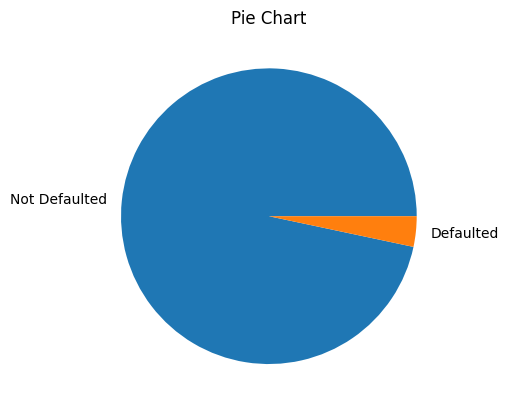

In [ ]:
#Pie Chart
labels = ['Not Defaulted', 'Defaulted']
sizes = [9667, 333]
plt.pie(sizes, labels=labels)
plt.title('Pie Chart')
plt.show()

In [ ]:
y = df.default
X = df.drop(['default'],axis=1)

In [ ]:
X.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary'], dtype='object')

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 2)

In [ ]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (7000, 4)
Shape of the X_test (3000, 4)
Shape of the y_train (7000,)
Shape of the y_test (3000,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 16, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 4, epochs = 10, verbose = 1)

Epoch 1/10
1750/1750 [==============================] - 10s 3ms/step - loss: 0.1448 - accuracy: 0.9617
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9687
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9699
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9693
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9709
Epoch 6/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0838 - accuracy: 0.9703
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9717
Epoch 8/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0831 - accuracy: 0.9727
Epoch 9/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0835 - accuracy: 0.9726
Epoch 10/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.08

In [ ]:
loss, acc = classifier.evaluate(x=X_test, y=y_test)

94/94 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9773


In [ ]:
'''
Conclusion
Here I have performed EDA and created an ANN model to predict whether a person will be able to pay their loan on time or be a defaulter.
'''

'\nConclusion\nHere I have performed EDA and created an ANN model to predict whether a person will be able to pay their loan on time or be a defaulter.\n'